In [1]:
import nbimporter

In [2]:
import STT
import emo_recog
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wave
from matplotlib.lines import Line2D
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline

Importing Jupyter notebook from STT.ipynb
Importing Jupyter notebook from emo_recog.ipynb


In [3]:
gcipath = "gs://thirdproj/data/test1.wav"
filepath = "data/test1.wav"

In [4]:
stt = STT.transcribe_gcs_with_word_time_offsets(gcipath)

In [6]:
emo = emo_recog.sttemo(filepath)

In [7]:
stt = pd.DataFrame(stt)
emo = pd.DataFrame(emo)

In [27]:
emo

,0,1,2,color,sen
0,excited,3.0000,0.0,r,안녕하세요 경미한 예리
1,neutral,6.0000,3.0,c,영상입니다 경영학을
2,excited,15.0000,6.0,r,여러기업 교육 프로그램을 개발 하면서 이론의 폭을 넓혔습니다 n4 인사팀에서 의 ...
3,happy,18.0000,15.0,g,교육 및 평가 운영을 하면서 실물하고
4,neutral,24.0000,18.0,c,인사해 서호 통영까지 김다미 얼마나 중요한지 깨닫게 되었습니다 저는
5,excited,27.0000,24.0,r,모임인 브레이브 his 설립했을
6,neutral,30.0000,27.0,c,팀원들과 함께 소통하며 그에 맞는
7,happy,33.0000,30.0,g,학술지를 3년간 발행한 경험이 있으며
8,neutral,39.0000,33.0,c,최대의 아카데미에서는 조직운영에 어려워서 톡 확인을
9,excited,45.0000,39.0,r,대신 tf 를 자발적으로 결성해 일을 해결했던 경험에 있습니다 직무와


In [26]:
emo['color'] = emo.iloc[:,0].copy()
emo['color'] = emo['color'].replace(['excited','neutral','happy','sad','frustration'], ['r','c','g','y','w'])

In [15]:
stt.head()

,0,1,2
0,안녕하세요,0.0,1.0
1,경미한,1.0,2.8
2,예리,2.8,3.1
3,인사담당자,3.1,3.9
4,영상입니다,3.9,4.6


In [16]:
emo.head()

,0,1,2,color,sen
0,excited,3.0,0.0,r,NaN
1,neutral,6.0,3.0,c,NaN
2,excited,15.0,6.0,r,NaN
3,happy,18.0,15.0,g,NaN
4,neutral,24.0,18.0,c,NaN


In [19]:
n = 0
sen = ""
emo['sen'] = np.nan
for i in range(len(stt)):
    if(stt.iloc[i,1]<=emo.iloc[n,1]):
        sen = sen+" "+stt.iloc[i,0]
    else :
        emo['sen'].iloc[n] = sen
        n = n+1
        sen = ""

C:\Users\smhrd08\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
result = emo.dropna(axis=0)
result

,0,1,2,color,sen
0,excited,3.0,0.0,r,안녕하세요 경미한 예리
1,neutral,6.0,3.0,c,영상입니다 경영학을
2,excited,15.0,6.0,r,여러기업 교육 프로그램을 개발 하면서 이론의 폭을 넓혔습니다 n4 인사팀에서 의 ...
3,happy,18.0,15.0,g,교육 및 평가 운영을 하면서 실물하고
4,neutral,24.0,18.0,c,인사해 서호 통영까지 김다미 얼마나 중요한지 깨닫게 되었습니다 저는
5,excited,27.0,24.0,r,모임인 브레이브 his 설립했을
6,neutral,30.0,27.0,c,팀원들과 함께 소통하며 그에 맞는
7,happy,33.0,30.0,g,학술지를 3년간 발행한 경험이 있으며
8,neutral,39.0,33.0,c,최대의 아카데미에서는 조직운영에 어려워서 톡 확인을
9,excited,45.0,39.0,r,대신 tf 를 자발적으로 결성해 일을 해결했던 경험에 있습니다 직무와


C:\Users\smhrd08\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


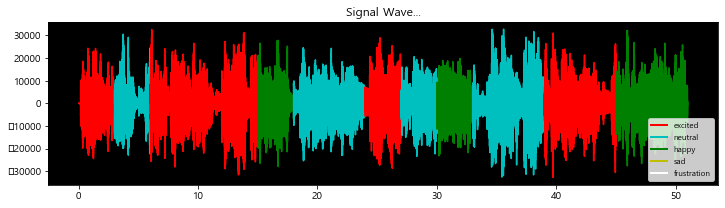

In [25]:
spf = wave.open(filepath,'r')
 
#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, dtype=np.int16)
framerate = spf.getframerate()
    
Time = np.linspace(0,len(signal)/framerate, num=len(signal))

plt.figure(figsize=(12, 3))
ax = plt.gca()
ax.set_facecolor('k')
plt.title('Signal Wave...')
for i in range(len(result)):
    D = (Time>result.iloc[i,2])&(Time<=result.iloc[i,1])
    plt.plot(Time[D],signal[D],emo['color'].iloc[i])

custom_lines = [Line2D([0], [0], color='r', lw=2),
                Line2D([0], [0], color='c', lw=2),
                Line2D([0], [0], color='g', lw=2),
                Line2D([0], [0], color='y', lw=2),
                Line2D([0], [0], color='w', lw=2)]
ax.legend(custom_lines, ['excited','neutral','happy','sad','frustration'],loc='lower right', prop={'size': 8})


plt.savefig("12")
plt.show()

In [33]:
from keras.models import load_model
from konlpy.tag import Twitter, Kkma

In [14]:
model = load_model('model/model7.hdf5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [88]:
data = stt.iloc[:,0].values
data = " ".join(data)

In [73]:
data = "반도체 시장에서의 G 네트워크  G 네트워크 구축은 최근 제가 가장 주목하고 있는 이슈입니다. G 네트워크는 과거 G, G, G까지의 속도 중심의 발전을 넘어 속도뿐만 아니라 초저지연, 초연결을 통해 모바일 이용에 집중됐던 통신 네트워크의 사용이 증강 현실, IoT 등으로 확대 활용될 전망입니다. 방대한 데이터를 실시간으로 주고받기 위해, 응답 속도의 중요성은 점점 더 영향력을 키워갈 것입니다. 삼성전 또한, 이에 주목하여 G 네트워크 전용 반도체 생태계 구축을 고도화해야 한다고 생각합니다.   G 네트워크가 영향력을 미치는 분야 중에서 IoT, AI 등 우리 생활과 가장 밀접한 차세대 기술 사회가 제게 가장 흥미로운 분야입니다. 삼성전는 최근, 역대 최고 속도의 차세대 모바일 메모리인 `GB eUFS .0`을 세계 최초로 양산하며 고도화되는 스마트폰 메모리 시장 선점에 앞서고 있습니다. 미래 먹거리 사업인 헬스 케어, IoT, 증강현실 등과 같은 우리 생활과 밀접한 기술의 편리성을 안정적으로 선보이기 위해서는 방대한 양의 데이터를 실시간으로 송수신하여 정보처리속도와 안정성을 잡아야 합니다. 그리고 이에 주목하여 G의 안정적인 구축을 위해 차세대 모듈, 고성능 메모리 등을 개발하는 것에 집중하여 미래를 대비해야 한다고 생각합니다.   또한, 기업의 미래를 위해 공학 인재 육성 사업에도 관심을 가지고 지속적으로 투함으로써 안정적이고 뛰어난 인력풀 형성에 앞장서 나아가 삼성전를 위한 전문인력을 수요를 증가시키는 것도 G 시대를 위한 대비책이 될 수 있다고 생각합니다. 이러한 G에 대한 대비책과 투를 지속적으로 한다면, 삼성전는 다른 기업과 차별화되는 ‘G’ 맞춤형 제품을 생산, 공급함으로써 안전한 IoT 시대를 구축하는 것을 선도할 것이라고 생각합니다. 그리고 삼성전에 일하게 된다면, 미래를 선도하는 회사에서 내 가족뿐만 아니라 모두의 일상의 편리함에 기여한다는 사명감을 가지고 일할 수 있을 것을 확신합니다.  글수 99,67     항목의 요구 사항에 맞게 중요하게 생각하는 이슈를 잘 설명하였고 지원의 견해를 글 서두에 제시한 점이 좋습니다.   이슈와 관련한 일반적인 정보를 나열하기 보다는 첫 문단에서 이야기한 G 네트워크 전용 반도체 생태계 구축과 관련한 방안에 초점을 맞춰 지원의 견해를 좀 더 집중적으로 설명하는 것이 더 호감을 줍니다.   처음에 제시한 지원의 견해에 대해 제대로 정리가 되지 않은 상황에서 또 다른 견해를 제시하고 있습니다. 이렇게 이것저것 여러 가지를 제안하면 내용만 복잡해지고, 깊이있는 내용을 다룰 수 없는 문제가 생깁니다. 첫 문단에서 이야기한 G 네트워크 전용 반도체 생태계 구축을 위한 지원의 아이디어가 제시되면 좋겠습니다."

In [89]:
kkma = Kkma()
twitter = Twitter()

In [90]:
l1 = twitter.nouns(data)
l2 = kkma.nouns(data)
l3 = list(set(l1).intersection(l2))

In [59]:
import pickle

In [60]:
with open('dict.pickle', 'rb') as handle:
    dic = pickle.load(handle)

In [91]:
dic2 = {}
for i in l3:
    if "'"+i+"'" in dic.keys():
        dic2["'"+i+"'"] = dic["'"+i+"'"]

In [104]:
inputData = list(dic2.values())

In [118]:
inputData2 = np.hstack([np.zeros(978-len(inputData)),inputData])

In [123]:
model.predict_classes(np.array(inputData2))

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [121]:
np.array(inputData2)

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e